In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [17]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [18]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [22]:
X_test_scaled

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [49]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [63]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8726 - loss: 0.3123 - val_accuracy: 0.8544 - val_loss: 0.3377
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8770 - loss: 0.3069 - val_accuracy: 0.8575 - val_loss: 0.3362
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8740 - loss: 0.3136 - val_accuracy: 0.8562 - val_loss: 0.3370
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.8783 - loss: 0.3043 - val_accuracy: 0.8569 - val_loss: 0.3368
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8737 - loss: 0.3047 - val_accuracy: 0.8569 - val_loss: 0.3376
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8714 - loss: 0.3110 - val_accuracy: 0.8556 - val_loss: 0.3357
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8720 - loss: 0.3133 - val_accuracy: 0.8537 - val_loss: 0.3363
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.8748 - loss: 0.3017 - 

In [64]:
model.layers[1].get_weights()

[array([[ 0.11142279,  0.13975035, -1.7357788 , -0.08949195, -0.39029542,
          0.4067479 ,  0.5067897 ,  0.2718979 ,  0.24927874, -0.1251424 ,
          0.6796098 ],
        [-0.47017375,  0.6716641 , -0.14098255,  0.3847228 , -0.1317007 ,
         -0.07937205, -0.19036111,  0.95136106, -0.3097912 ,  0.03708053,
          0.01939227],
        [ 0.42678586, -0.39768448, -0.40484497, -1.0566525 ,  0.21472102,
          0.5262237 , -0.08035795, -0.11742746,  0.13613144, -0.64049053,
          0.17487909],
        [ 0.10457048, -0.56112957,  0.48296246,  0.3742332 ,  0.1771293 ,
         -0.06338435,  0.10443716,  0.3580484 ,  0.10796852,  0.02761634,
          0.31054443],
        [-0.3284909 ,  0.38668078,  0.11062761,  0.21530676,  0.9210949 ,
         -8.11223   , -0.2448558 , -0.66558796, -0.32645264, -0.20449206,
          0.1258936 ],
        [ 0.7850354 , -0.50702715, -0.01716634, -0.5403392 , -0.3171416 ,
          0.36831513,  0.6017836 , -0.7171434 ,  0.38313377,  0.1654145

In [65]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step


In [66]:
y_pred=np.where(y_log>0.5,1,0)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.862

In [68]:
import matplotlib.pyplot as plt

In [69]:
history.history

{'accuracy': [0.8707812428474426,
  0.8715624809265137,
  0.8737499713897705,
  0.8721874952316284,
  0.8720312714576721,
  0.8714062571525574,
  0.8707812428474426,
  0.8706250190734863,
  0.8731250166893005,
  0.8745312690734863,
  0.871874988079071,
  0.8712499737739563,
  0.8714062571525574,
  0.8714062571525574,
  0.8723437786102295,
  0.8712499737739563,
  0.8732812404632568,
  0.8725000023841858,
  0.8723437786102295,
  0.8720312714576721,
  0.8706250190734863,
  0.8715624809265137,
  0.8726562261581421,
  0.8728125095367432,
  0.8715624809265137,
  0.8735937476158142,
  0.8717187643051147,
  0.8714062571525574,
  0.871874988079071,
  0.8707812428474426,
  0.8723437786102295,
  0.8726562261581421,
  0.8735937476158142,
  0.8729687333106995,
  0.8712499737739563,
  0.8725000023841858,
  0.871874988079071,
  0.8734375238418579,
  0.8714062571525574,
  0.8732812404632568,
  0.8725000023841858,
  0.8726562261581421,
  0.87109375,
  0.8734375238418579,
  0.8732812404632568,
  0.87296

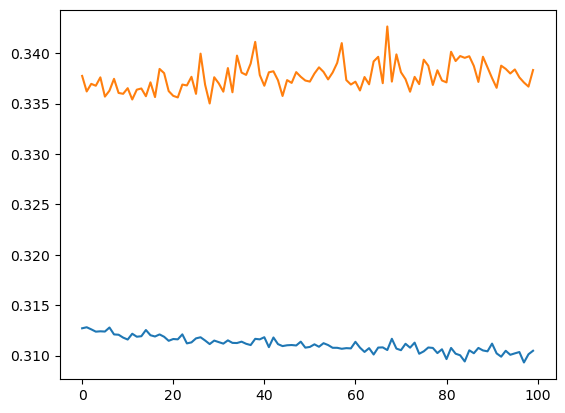

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

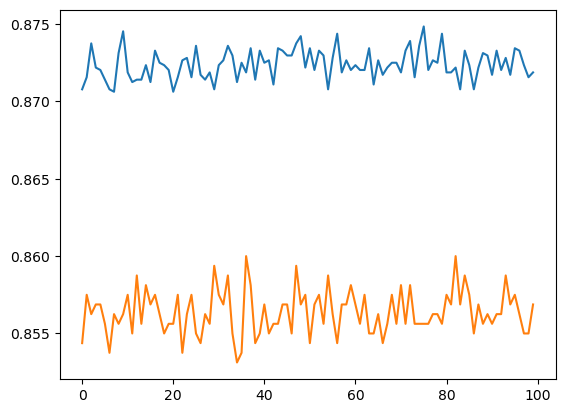

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])